 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:

# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:

# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
SP_data = Path("Resources/sp500_history.csv")
SP_df = pd.read_csv(SP_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [11]:
# Check Data Types
SP_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
SP_df["Close"]= SP_df["Close"].str.replace('$', '', regex = True).astype("float")
SP_df.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns

SP_daily_return = SP_df.pct_change()
SP_daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls
SP_daily_return.dropna()
SP_daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [15]:
# Rename `Close` Column to be specific to this portfolio.
SP_daily_return.rename(columns= {"Close":"SP500"}, inplace=True)
SP_daily_return.head()

,SP500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, SP_daily_return], axis = "columns", join ="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

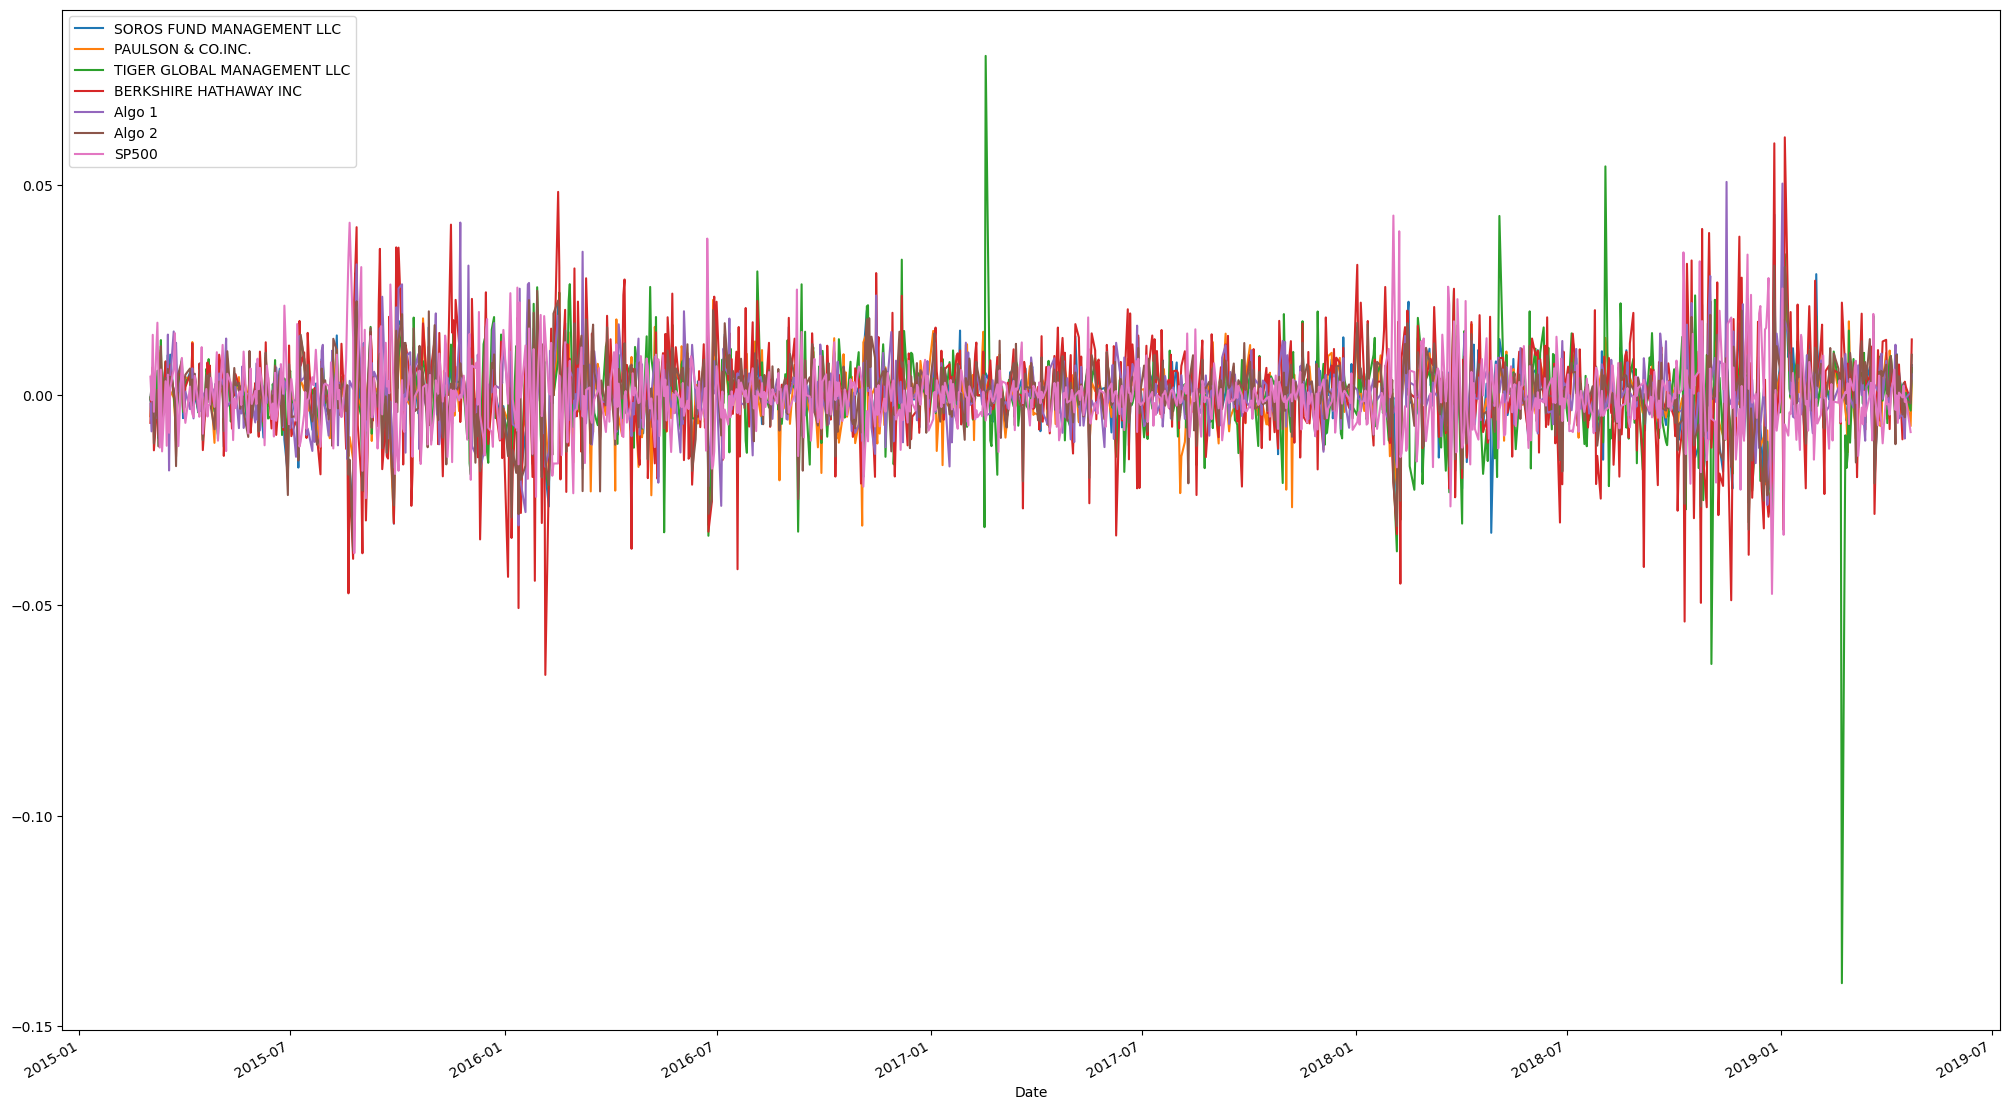

In [17]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (25, 15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

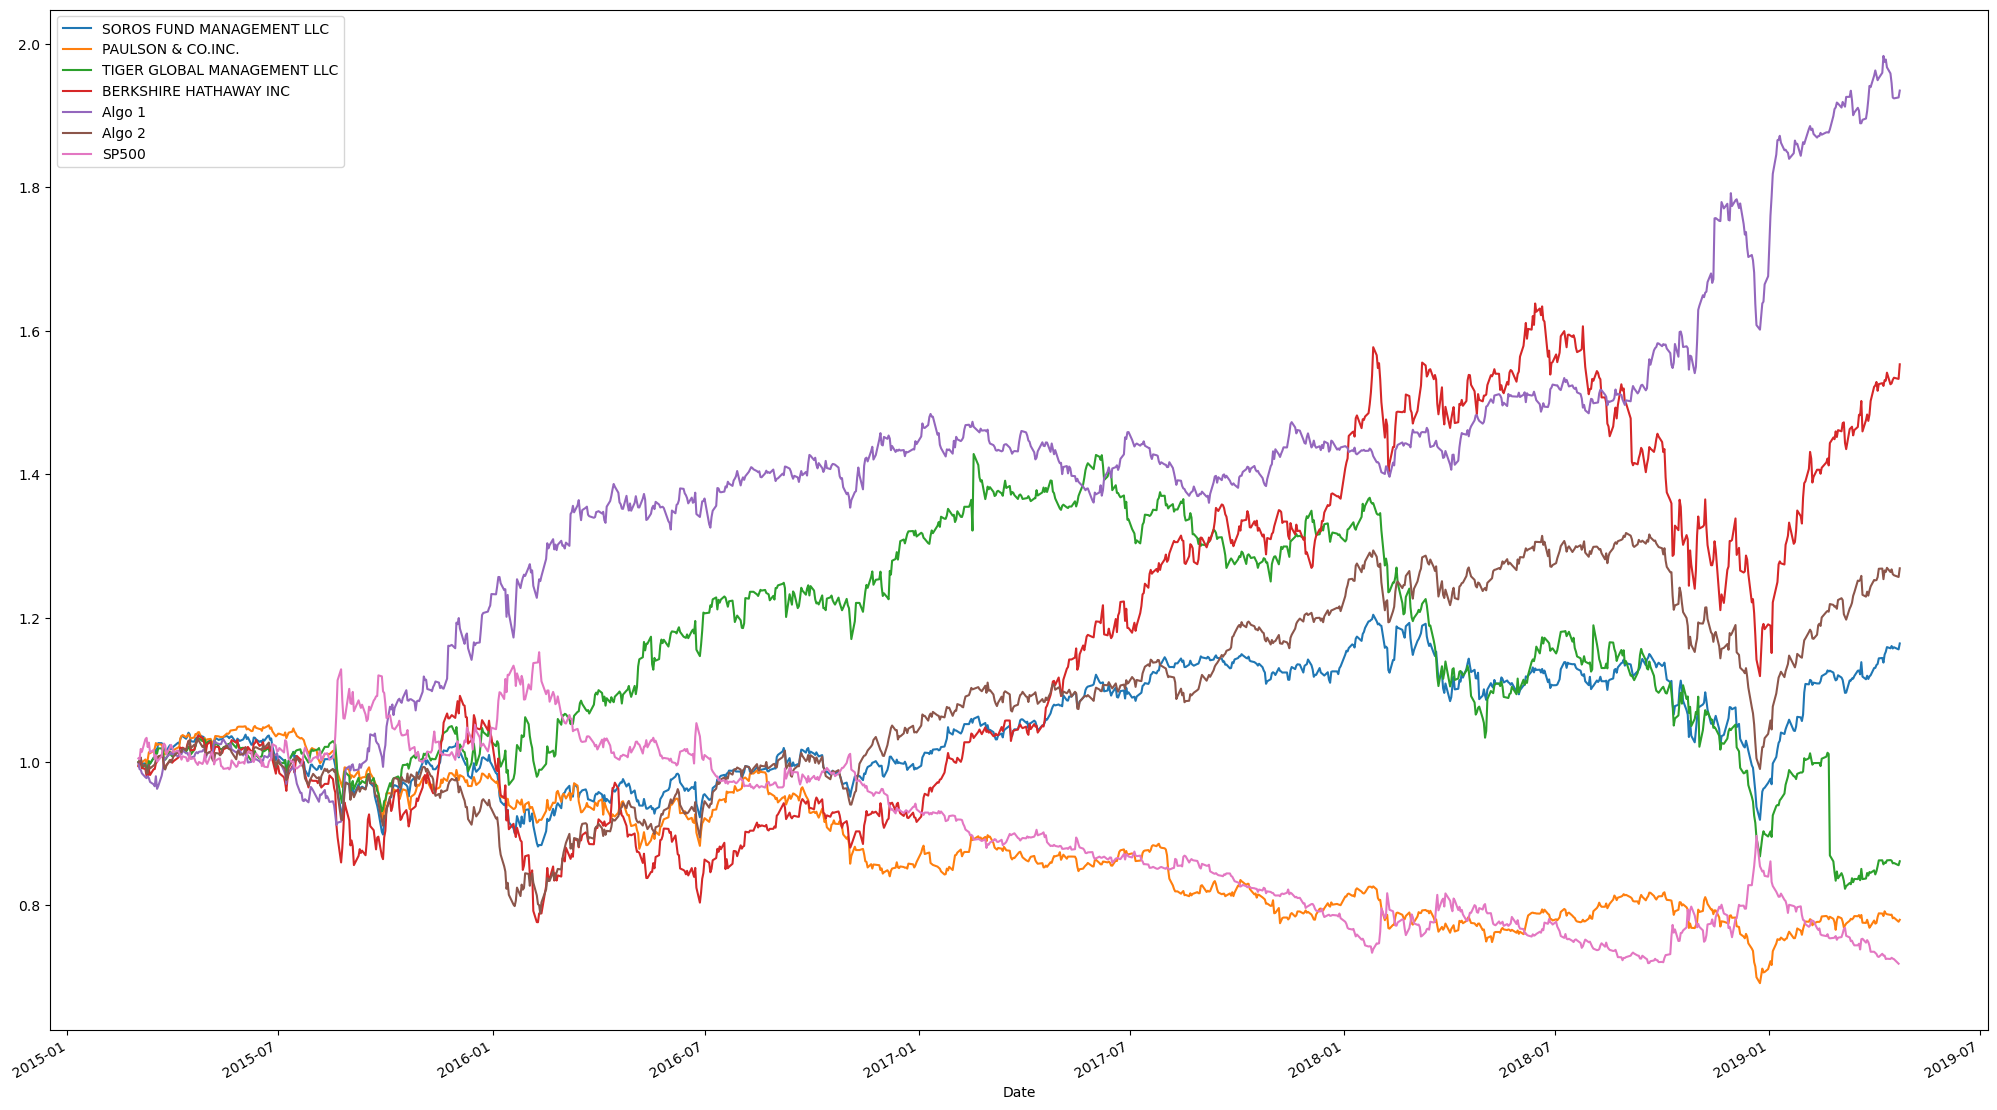

In [18]:
# Calculate cumulative returns of all portfolios
cumulative = (1 + combined_returns).cumprod()
cumulative.head()
# Plot cumulative returns
cumulative.plot(figsize = (25,15))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


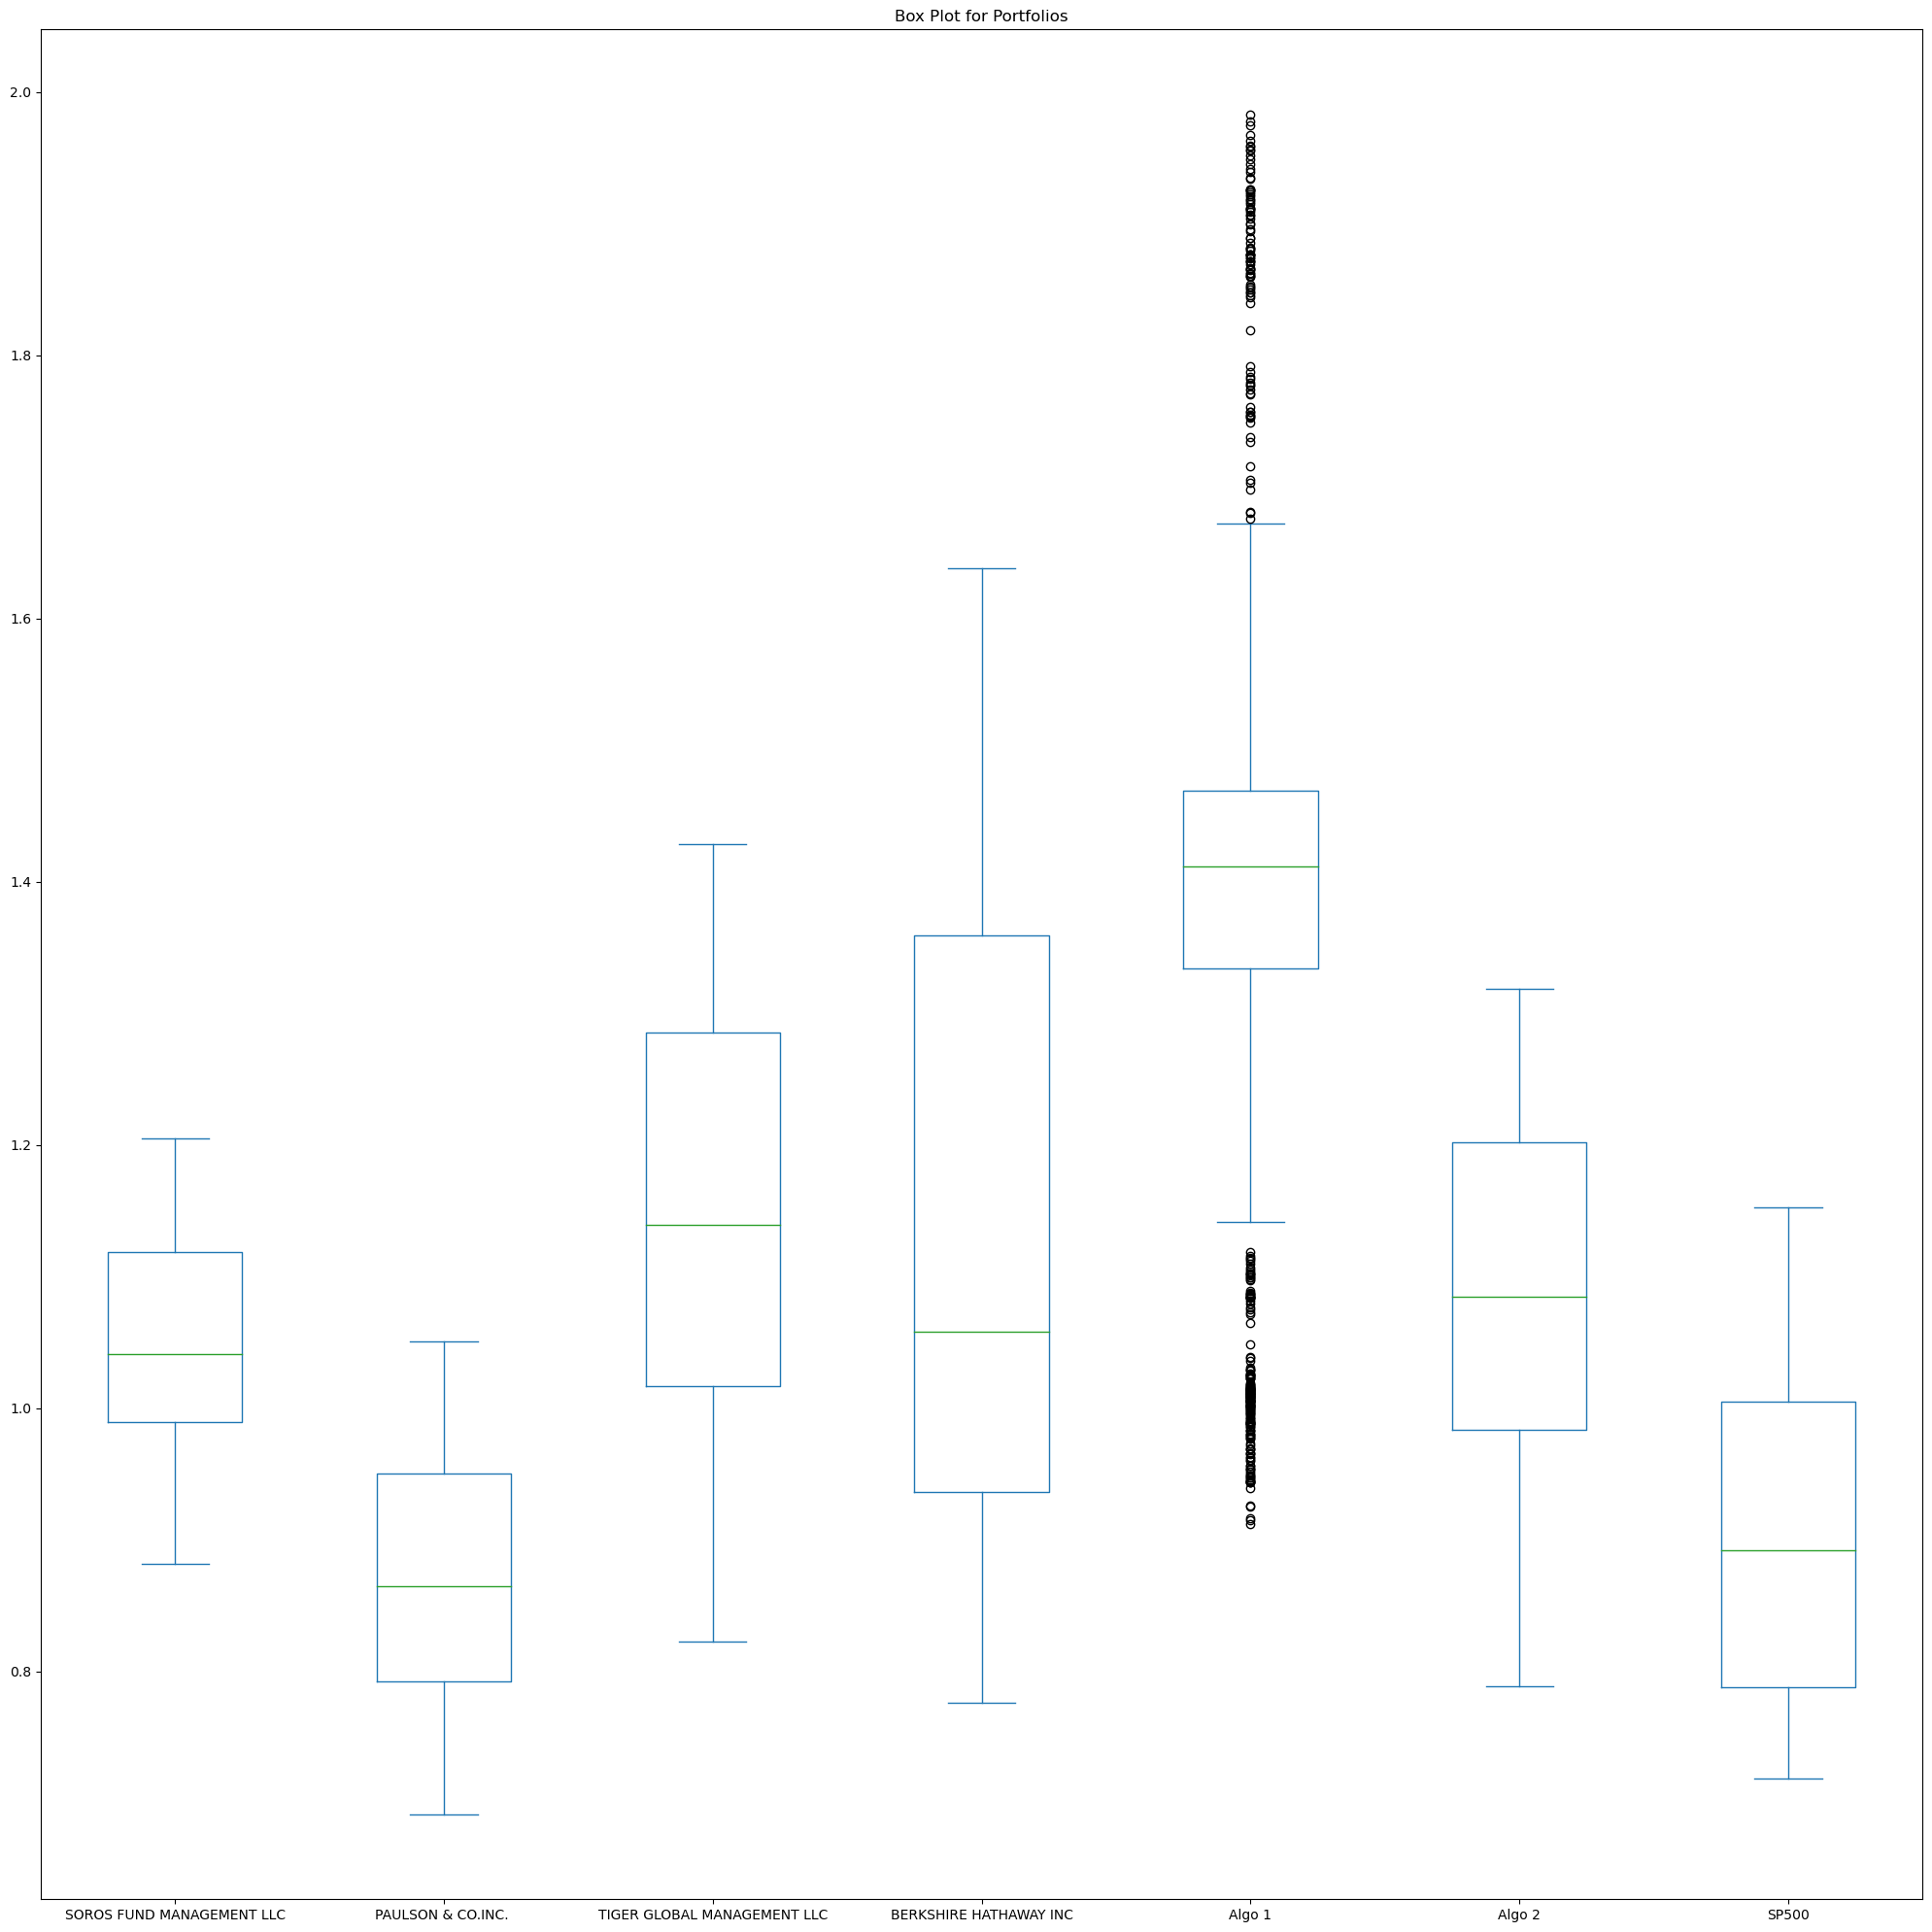

In [19]:

# Box plot to visually show risk
boxplot = cumulative.plot.box(title="Box Plot for Portfolios", figsize=(25,25))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
joined_std = cumulative.std()
joined_std = joined_std.sort_values(ascending=False)
joined_std

BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
TIGER GLOBAL MANAGEMENT LLC    0.149844
Algo 2                         0.131700
SP500                          0.114846
PAULSON & CO.INC.              0.088455
SOROS FUND MANAGEMENT LLC      0.073238
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = SP_daily_return.std()
sp500_std.head()
# Determine which portfolios are riskier than the S&P 500
total_std = pd.DataFrame(combined_returns.std()).rename(columns = {0:"std"})
total_std.sort_values('std', ascending=False)

,std
BERKSHIRE HATHAWAY INC,0.012919
TIGER GLOBAL MANAGEMENT LLC,0.010894
SP500,0.008587
Algo 2,0.008342
SOROS FUND MANAGEMENT LLC,0.007895
Algo 1,0.007620
PAULSON & CO.INC.,0.007023


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std

BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
TIGER GLOBAL MANAGEMENT LLC    2.378706
Algo 2                         2.090678
SP500                          1.823124
PAULSON & CO.INC.              1.404180
SOROS FUND MANAGEMENT LLC      1.162620
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

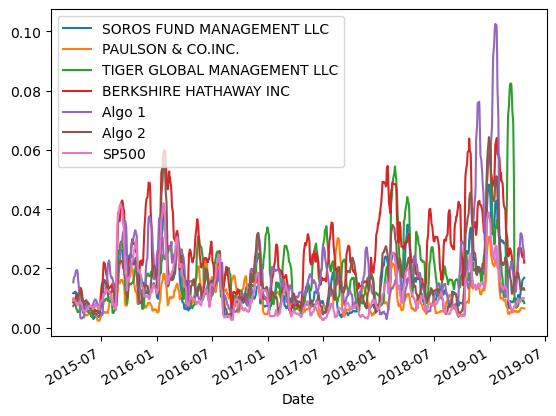

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolios_rolling21 = cumulative.rolling(window=21).std().plot()
# Plot the rolling standard deviation
portfolios_rolling21

### Calculate and plot the correlation

<AxesSubplot:>

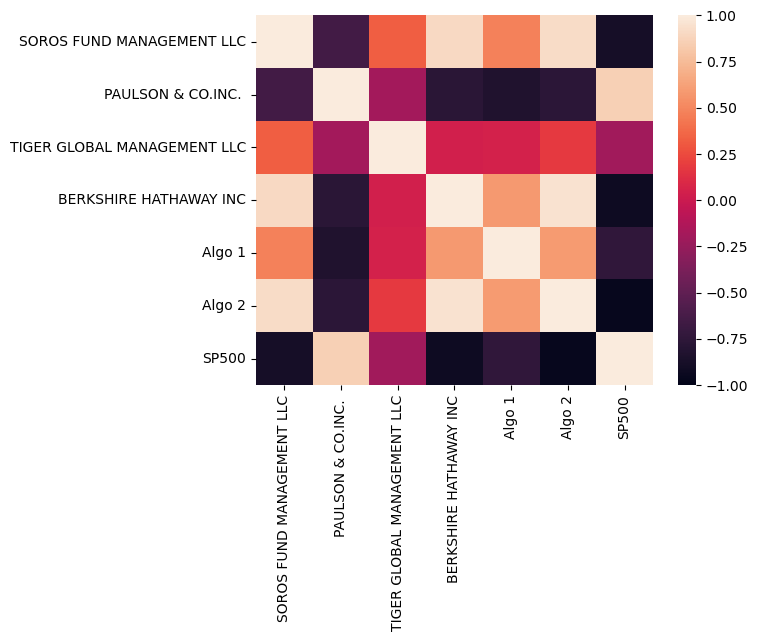

In [24]:
# Calculate the correlation
portfolio_corr = cumulative.corr()
# Display de correlation matrix
sns.heatmap(portfolio_corr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

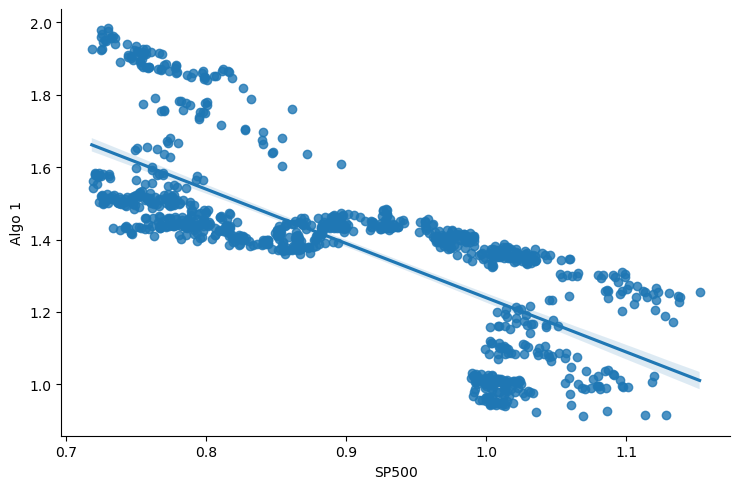

In [25]:
# Calculate covariance of a single portfolio
covariance_algo1 = cumulative['Algo 1'].corr(cumulative['SP500'])
covariance_algo1
# Calculate variance of S&P 500
variance_sp500 = cumulative['SP500'].var()
variance_sp500
# Computing beta
algo1_beta = covariance_algo1 / variance_sp500
algo1_beta
# Plot beta trend
sns.lmplot(x='SP500', y='Algo 1', data=cumulative, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

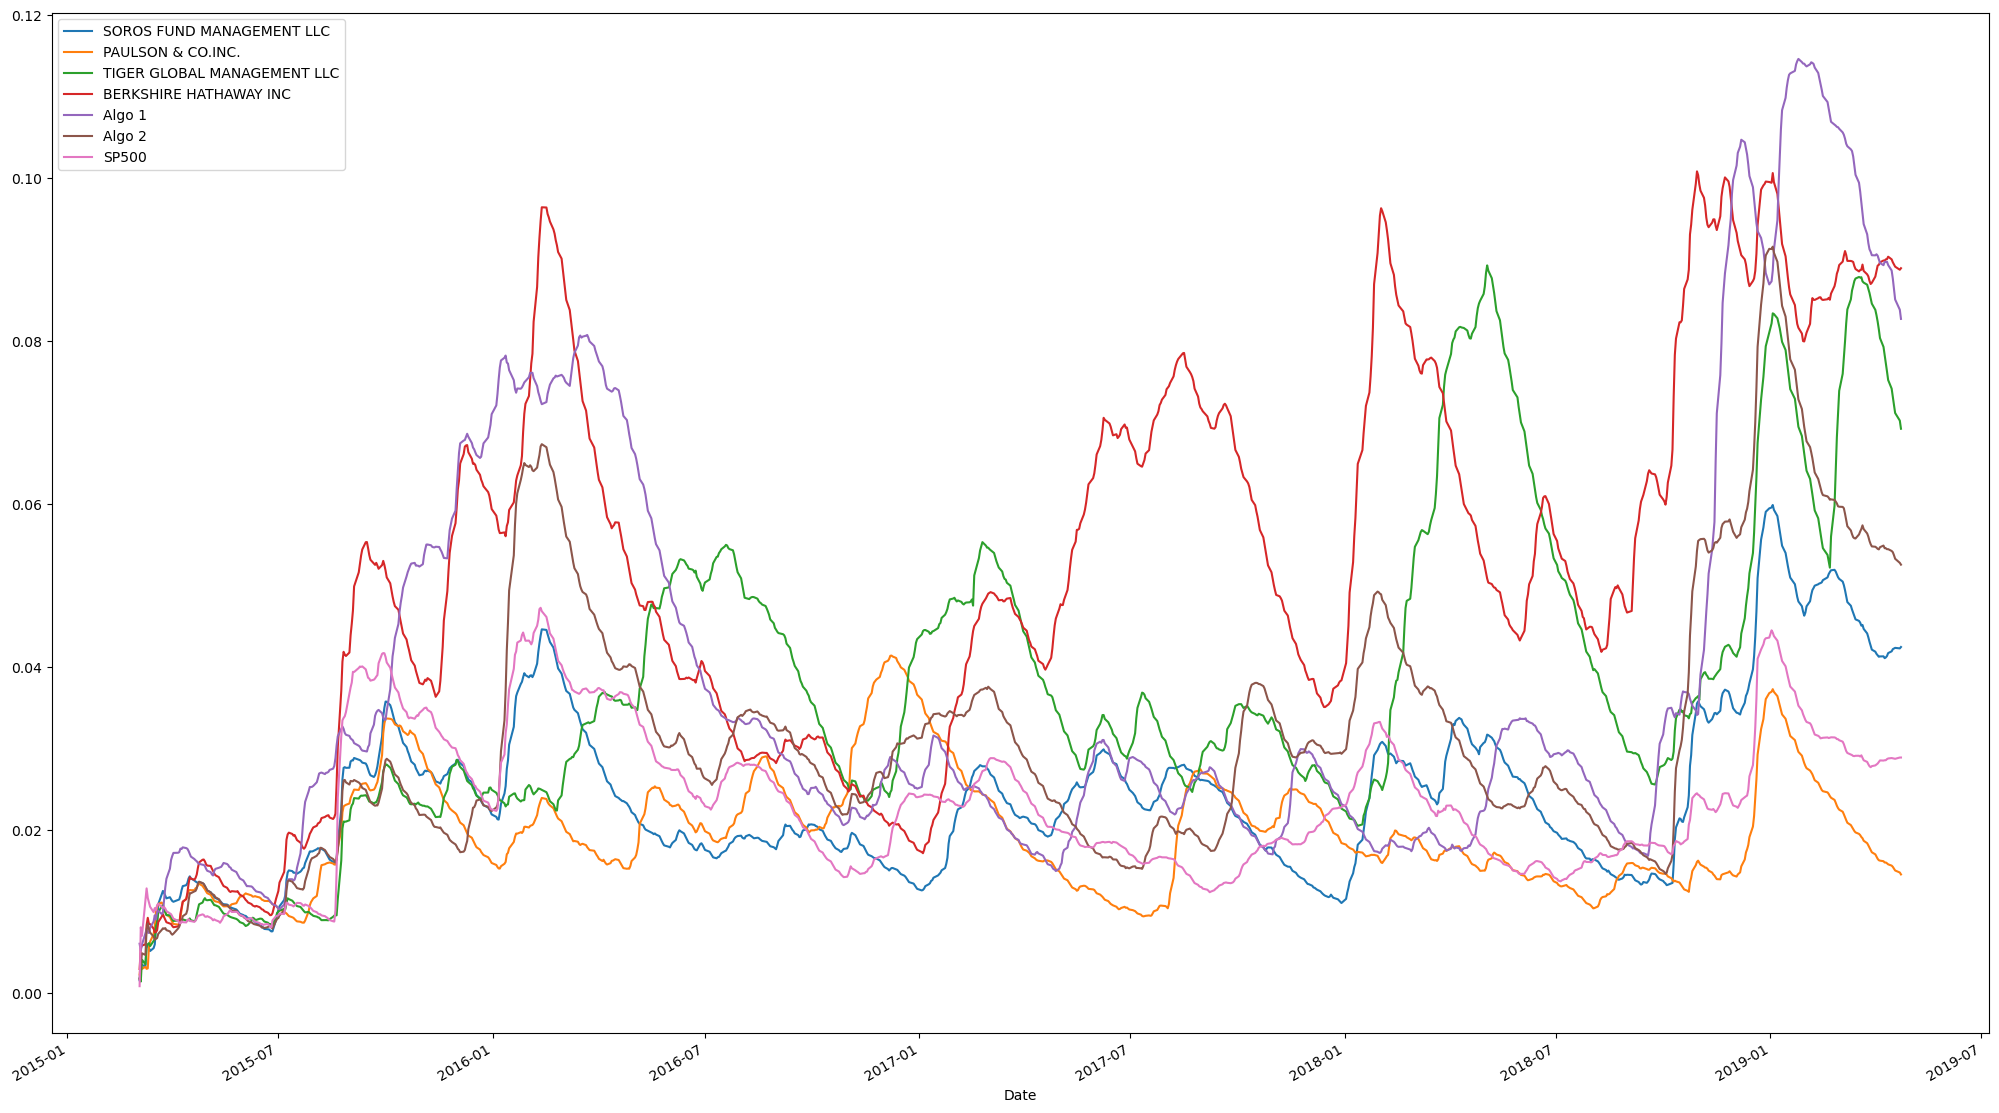

In [26]:

# Use `ewm` to calculate the rolling window
cumulative.ewm(halflife=21).std().plot(figsize=(25,15))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
# Annualized Sharpe Ratios
sharpe_ratio = ((cumulative.mean() * 252) / (cumulative.std() * np.sqrt(252)))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      227.552462
PAULSON & CO.INC.              157.217634
TIGER GLOBAL MANAGEMENT LLC    121.615471
BERKSHIRE HATHAWAY INC          76.201626
Algo 1                          94.927346
Algo 2                         131.015483
SP500                          124.481171
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

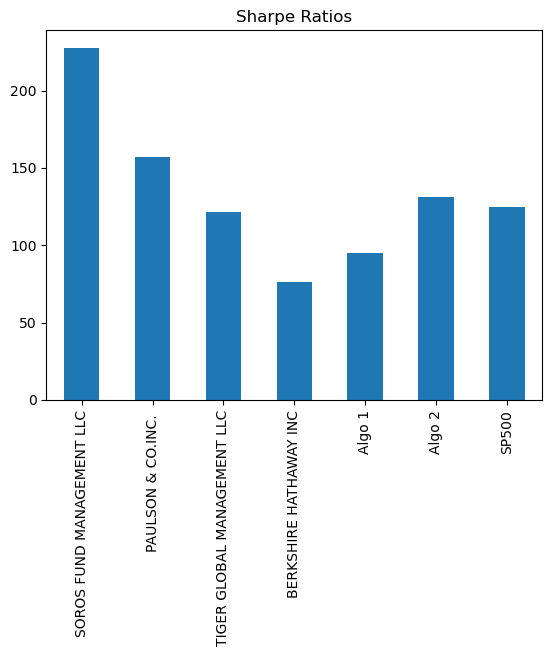

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
aapl_csv = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

aapl_df.sort_index(inplace=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [30]:
# Reading data from 2nd stock
cost_csv = Path("./Resources/cost_historical.csv")
cost_his_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

cost_his_df.sort_index(inplace=True)
cost_his_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [31]:
# Reading data from 3rd stock
goog_csv = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

goog_df.sort_index(inplace=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [32]:
# Combine all stocks in a single DataFrame
portfolio_data = pd.concat([aapl_df, cost_his_df, goog_df], axis="rows", join="inner")

In [33]:

# Reset Date index
mu_portfolio_data = portfolio_data.reset_index()

In [34]:
# Reorganize portfolio data by having a column per symbol
# Reorganize portfolio data by having a column per symbol
my_portfolio_data = mu_portfolio_data.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
my_portfolio_data.sort_index(inplace=True)
my_portfolio_data.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [35]:
# Calculate daily returns
my_portfolio_data = my_portfolio_data.pct_change()

# Drop NAs
my_portfolio_data = my_portfolio_data.dropna()

# Display sample data
my_portfolio_data.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
returns = my_portfolio_data.dot(weights)

# Display sample data
returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
# Join your returns DataFrame to the original returns DataFrame
total_portfolio_returns = pd.concat([returns, combined_returns], axis="columns", join="inner" )
total_portfolio_returns.rename(columns = {0:"PORTFOLIO"}, inplace = True)
total_portfolio_returns.head()

,PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio_returns.dropna()

,PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333
...,...,...,...,...,...,...,...,...
2019-04-15,0.007522,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
combined_returns_std = total_portfolio_returns.std()
combined_returns_std.head()

PORTFOLIO                      0.013323
SOROS FUND MANAGEMENT LLC      0.009240
PAULSON & CO.INC.              0.007353
TIGER GLOBAL MANAGEMENT LLC    0.014648
BERKSHIRE HATHAWAY INC         0.015569
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

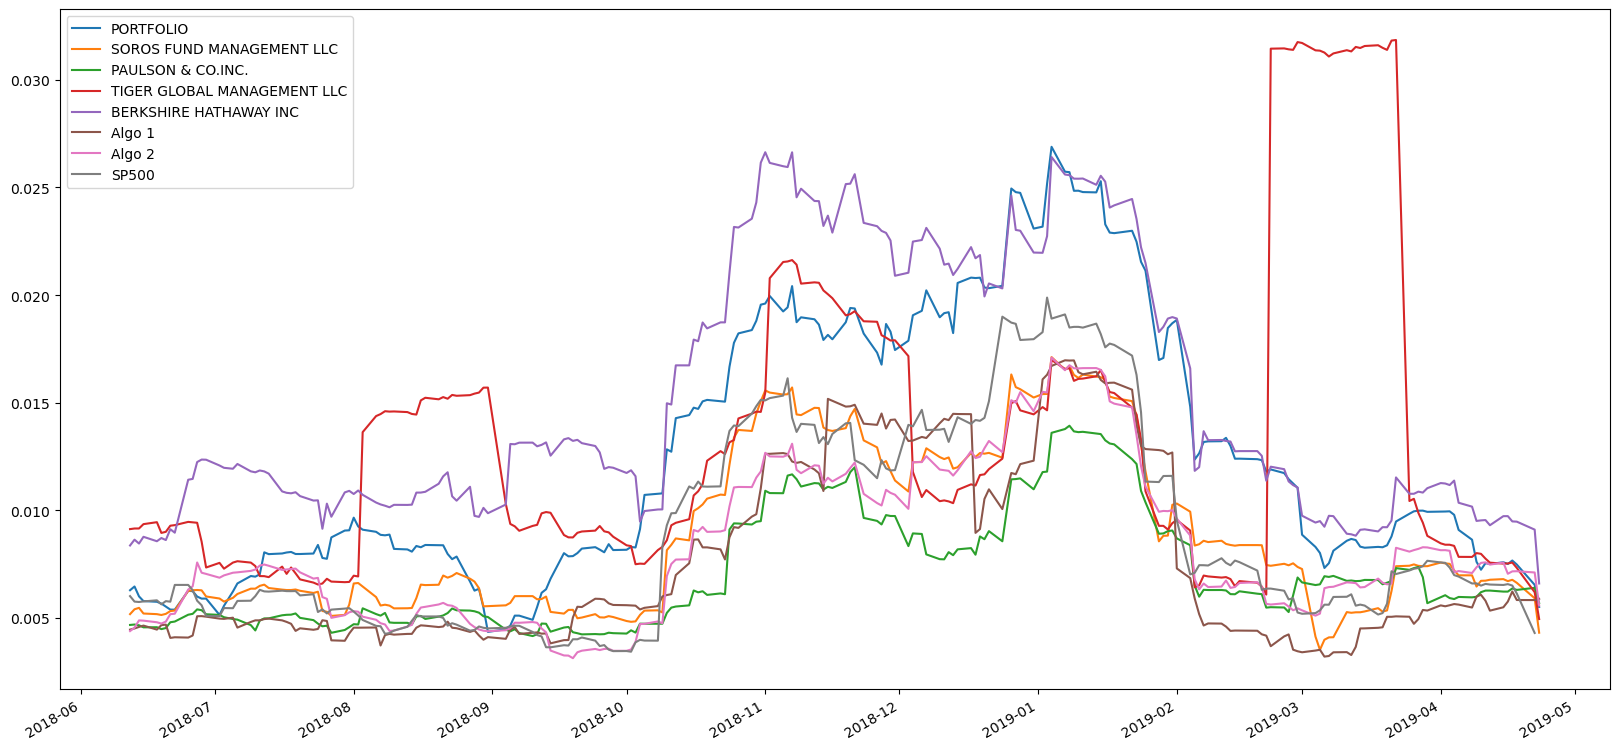

In [40]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
total_portfolio_returns.rolling(window=21).std().plot(figsize = (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

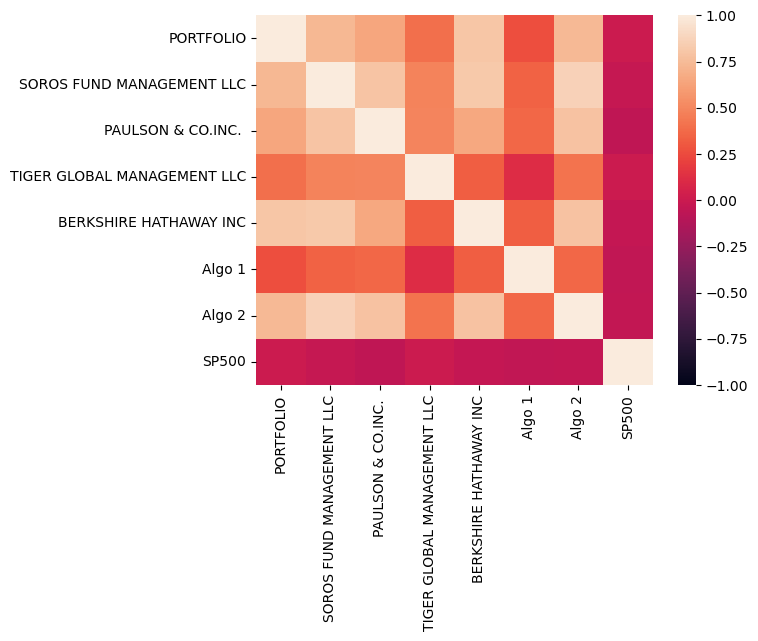

In [41]:
# Calculate and plot the correlation
# Calculate and plot the correlation
correlation = total_portfolio_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

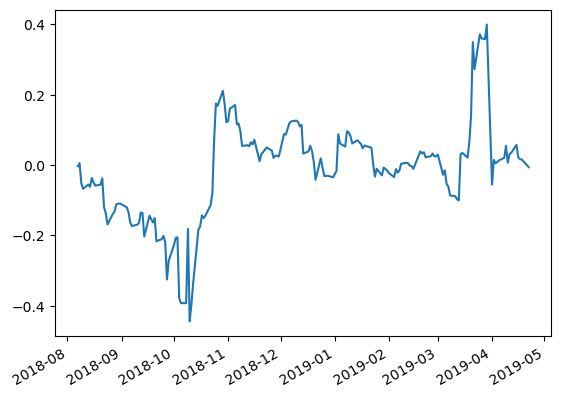

In [42]:

# Calculate and plot Beta
covariance = returns.rolling(window=60).cov(total_portfolio_returns['SP500'])
variance = (total_portfolio_returns['SP500']).rolling(window=60).var()
portfolio_beta = covariance / variance
portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualized Sharpe Ratios
my_sharpe_ratios = (total_portfolio_returns.mean()*252) / (total_portfolio_returns.std()*np.sqrt(252))
my_sharpe_ratios

PORTFOLIO                      0.933123
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                         -0.427676
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

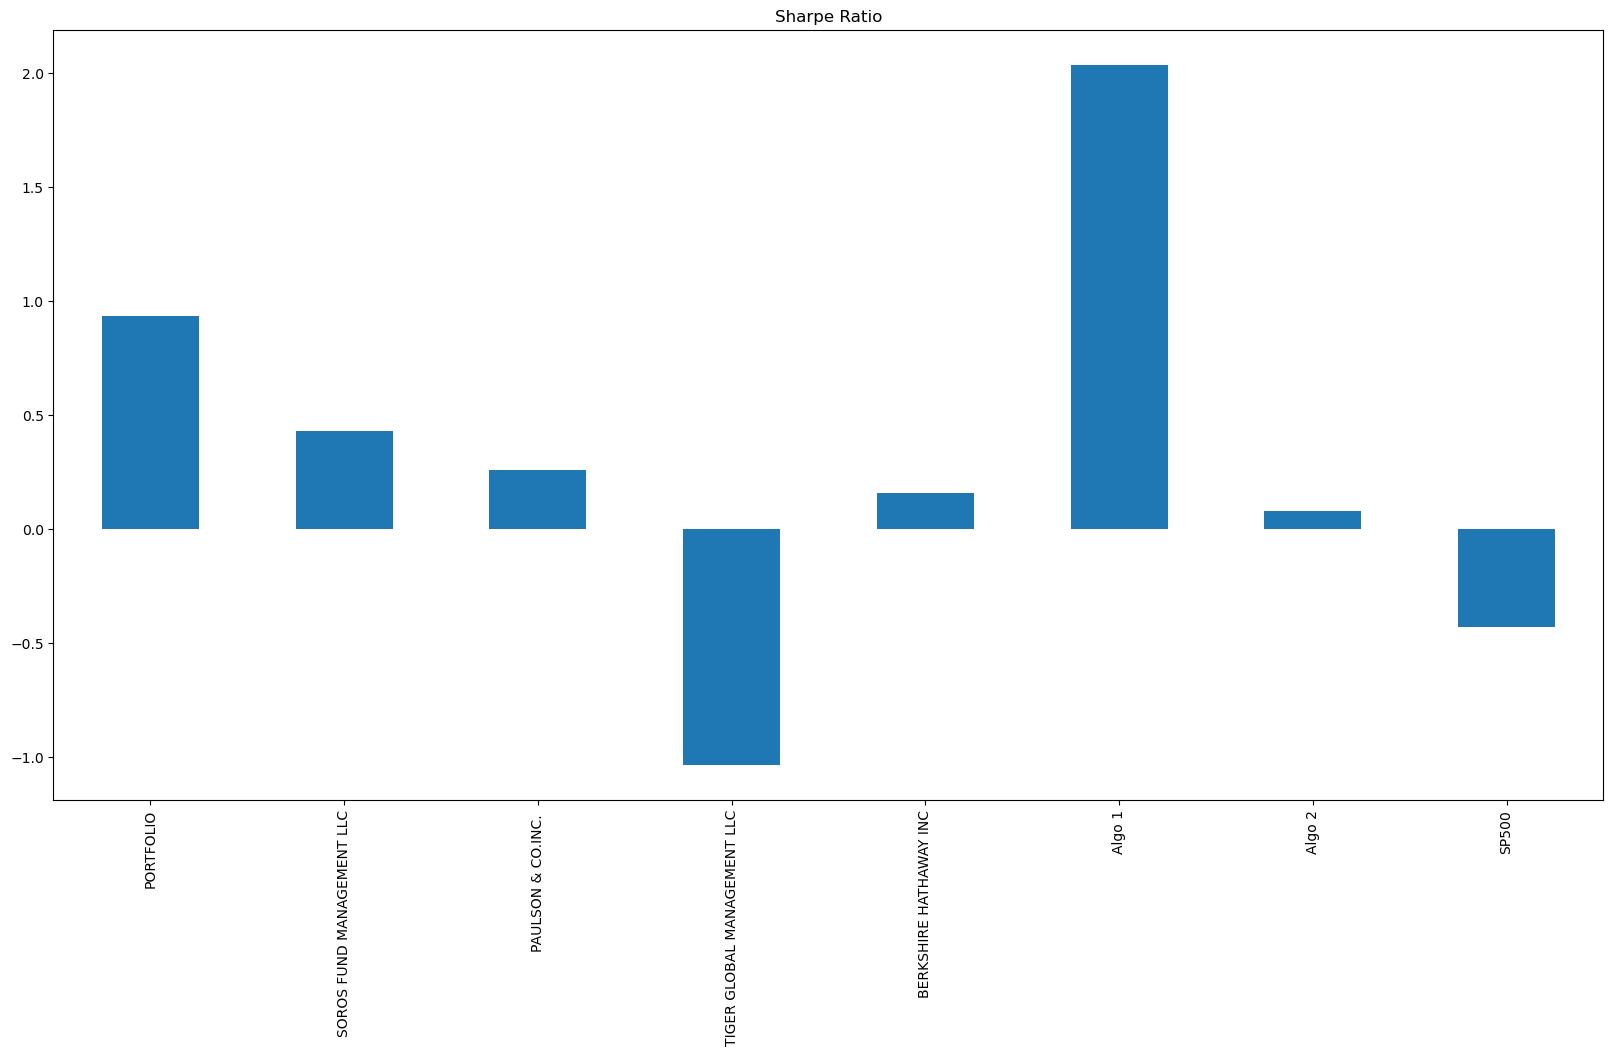

In [44]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios.plot(kind='bar', figsize=(20,10), title ="Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

In [46]:
print("Better then i thought, but not as good as algo 1 ")

Better then i thought, but not as good as algo 1 
